In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [ ]:
train = pd.read_csv("../input/restaurant-revenue-prediction/train.csv.zip")
test = pd.read_csv("../input/restaurant-revenue-prediction/test.csv.zip")

**Data Viz**

In [ ]:
train.head(5)

In [ ]:
test.head(5)

**Features Explanation**

Id : Restaurant id.

Open Date : opening date for a restaurant

City : City that the restaurant is in. Note that there are unicode in the names. 

City Group: Type of the city. Big cities, or Other. 

Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [ ]:
display(train.columns)


In [ ]:
train.info()

In [ ]:
test.columns


In [ ]:
test.info()

**Target Varaible = "Revenue"**


In [ ]:
train["revenue"].describe()

In [ ]:
sns.distplot(train['revenue'])


In [ ]:
train["revenue"].head()

In [ ]:
train["revenue"].isna().sum()


In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=1, square=True);

In [ ]:
train["City"].head()

Data Preprocessing:

EDA/Data Cleaning: Exploring Data & Identifying and correcting mistakes or errors in the data.

Feature Selection: Identifying those input variables that are most relevant to the task.

Data Transforms: Changing the scale or distribution of variables.

Feature Engineering: Deriving new variables from available data.

Dimensionality Reduction: Creating compact projections of the data.

Dropping Some Unncessary Features

In [ ]:
drop_values = ['Id','Open Date']

In [ ]:
train.drop(drop_values,axis=1,inplace=True)
test.drop(drop_values,axis=1,inplace=True)

In [ ]:
pip install dataprep

In [ ]:
from dataprep.datasets import get_dataset_names
from dataprep.datasets import load_dataset
from dataprep.eda import create_report,plot,plot_missing
import scipy.stats as stats

In [ ]:
# function for overall statistical report
def overall_stat(df):
    # display the overall stat report
    display(plot(df, display=['Stats', 'Insights']))
    # display(df.info())

    # store and display the numerical and nonn-numerical cols in df
    num_cols=list(df.select_dtypes(include=['number']).columns)
    non_num_cols=list((set(df.columns)-set(num_cols)))

    print(f'Num cols = {num_cols}')
    print(f'Non-num cols = {non_num_cols}')

In [ ]:
# display the overall stats
overall_stat(train)

**Univariate Analysis**

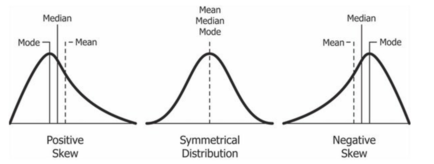

Numerical Univariate Analysis

In [ ]:
# define the interest feature you want to explore
inter_features='revenue'

# define the function for univariate analysis
def num_uni_analysis(df,inter_features):
    display(plot(df,inter_features,display=['Stats','KDE Plot','Normal Q-Q Plot','Box Plot']))
    skewness=df[inter_features].skew()
    kurtosis=df[inter_features].kurtosis()
    print(f'-The Skewness = {skewness}')
    if abs(skewness)<1:
        print(f'The [{inter_features}] distribution is nearly normal')
    elif skewness>1:
        print(f'The [{inter_features}] distribution is right skewed ')
    else:
        print(f'The [{inter_features}] distribution is left skewed ')
    print(f'-The Kurtosis = {kurtosis}')

In [ ]:
# display the univariate analysis result for feature [revenue]
num_uni_analysis(train,inter_features)

Categorical Univariate Analysis

In [ ]:
# define the function for univariate analysis
def cat_uni_analysis(df,inter_features):
    print(f'The Non-Numerical Column You Choose is: [{inter_features}]\n')
    display(plot(df,inter_features,display=['Stats','Pie Chart','Value Table']))

In [ ]:
cat_uni_analysis(train,inter_features='Type')
cat_uni_analysis(train,inter_features='City')
cat_uni_analysis(train,inter_features='City Group')

**Bivariate Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# overall num-num relationship: correlation heatmap
def heatmap(df,figsize):
    fig, axs=plt.subplots(figsize=figsize)
    sns.heatmap(df.corr(),annot=True, linewidths=.7,cmap='coolwarm',fmt='.1f',ax=axs)
    

In [ ]:
heatmap(df=train,figsize=(25,25))

Cat-Num Relationship

In [ ]:
pip install scikit-posthocs

In [ ]:
#kruskal test used for cat-num relationship
import scikit_posthocs as sp


In [ ]:
# categoircal-numerical relationship (cat_feature - target)

def cat_num_relationship(df,cat_col,num_col):
    # visualization
    print(f'[{cat_col}] --- [{num_col}] relationship')
    display(plot(df,num_col,cat_col))
    
    # hypothesis testing for catgorical-numerical relationship (Kruskal test)
    pc = sp.posthoc_conover(df, val_col=num_col, group_col=cat_col,p_adjust = 'holm')
    # visualization of the heatmap
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

    # plot
    fig, ax = plt.subplots(ncols=1)
    fig.suptitle('Significance Plot')
    sp.sign_plot(pc,**heatmap_args,ax=ax) 
    fig.show()

In [ ]:
cat_num_relationship(df=train,
                    cat_col='City',
                    num_col='revenue')

cat_num_relationship(df=train,
                    cat_col='Type',
                    num_col='revenue')

cat_num_relationship(df=train,
                    cat_col='City Group',
                    num_col='revenue')

**Categorical-Categorical Relationship**

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# categoircal-categorical relationship

def cat_cat_relationship(df,cat_col_1,cat_col_2):
    # visualization
    plot(df,cat_col_1,
         cat_col_2,
         display=['Stacked Bar Chart','Heat Map'])
    
    # Chi-square test
    
    # 1st step convert the data into a contingency table with frequencies
    chi_contigency=pd.crosstab(df[cat_col_1],df[cat_col_2])
    print(f'Selected cols [{cat_col_1}] and [{cat_col_2}]')
    print('chi2-contingency table')
    display(chi_contigency)
    
    # 2nd step: Chi-square test of independence.
    c, p, dof, expected = chi2_contingency(chi_contigency)
    if p<0.05:
      print('Reject Null Hypothesis')
      print(f'The:\n [{cat_col_1}],[{cat_col_2}] are not independent\n')
    else:
      print('Fail to Reject Null Hypothesis')
      print(f'The:\n [{cat_col_1}],[{cat_col_2}] are independent\n') 
    print(f'The P-value = {p}')

In [ ]:
# display the result
cat_cat_relationship(df=train,
                    cat_col_1='City Group',
                    cat_col_2='Type')

In [ ]:
nulls_train = train.isnull().sum()
nulls_train[nulls_train > 0]

In [ ]:
nulls_test = test.isnull().sum()
nulls_test[nulls_test > 0]

**Label Encoding**

In [ ]:
from sklearn import preprocessing


In [ ]:
train

In [ ]:
# define the function for label or one-hot encoding
def label_encode_transform(df,cols):
    cols=cols
    le = preprocessing.LabelEncoder()
    df[cols]=df[cols].apply(le.fit_transform)
    return df
    
def onehot_encode_transform(df,cols):
    cols=cols
    df=pd.get_dummies(df,columns=cols)
    return df

In [ ]:
train_df_encoded = label_encode_transform(df=train,cols = ['City'])

train_df_encoded = onehot_encode_transform(df=train,cols = ['City Group','Type'])

test_df_encoded = label_encode_transform(df=test,cols = ['City'])

test_df_encoded = onehot_encode_transform(df=test,cols = ['City Group','Type'])

In [ ]:
train_df_encoded.info()

**Defining X & Y**

In [ ]:
# seperate the source and the target variables
feature_cols = [x for x in train_df_encoded.columns if x != 'revenue']
X_train = train_df_encoded[feature_cols]
y_train = train_df_encoded['revenue']

X_test  = test_df_encoded[feature_cols]

**Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#for this post we will use MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train.T).T,columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test.T).T,columns=X_test.columns)

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train_scaled, y_train)
# get importance
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
n_top_features = 25
top_features = importance.argsort()[-n_top_features:]
print(top_features)  # [ 0  4  7 12  5]

In [ ]:
X_train_final = X_train_scaled.iloc[:, top_features]
X_test_final = X_test_scaled.iloc[:, top_features]

In [ ]:
X_train_final.info()

In [ ]:
X_test_final.info()

**Models**

Model Building

Linear Regression

Ridge Regression

Lasso Regression

KNN

Decision Tree Algorithm

Random Regression

SVM

In [ ]:
##Linear Regression

import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_final, y_train)
reg.score(X_train_final, y_train)

In [ ]:
reg.coef_


In [ ]:
reg.intercept_


In [ ]:
y_train_pred = reg.predict(X_train_final)


In [ ]:
from sklearn import metrics
##MAE
print("MAE:",metrics.mean_absolute_error(y_train,y_train_pred))
##MSE
print("MSE:",metrics.mean_squared_error(y_train,y_train_pred))
##RMSE
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_train,y_train_pred)))

In [ ]:
##Ridge Regression

from sklearn.linear_model import Ridge
import numpy as np
from pandas import read_csv
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train_final, y_train)
y_train_ridge_pred = ridge.predict(X_train_final)

In [ ]:
from sklearn import metrics
##MAE
print("MAE:",metrics.mean_absolute_error(y_train,y_train_ridge_pred))
##MSE
print("MSE:",metrics.mean_squared_error(y_train,y_train_ridge_pred))
##RMSE
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_train,y_train_ridge_pred)))

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

##Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_final, y_train) 
y_train_lasso_pred = model_lasso.predict(X_train_final)

In [ ]:
from sklearn import metrics
##MAE
print("MAE:",metrics.mean_absolute_error(y_train,y_train_lasso_pred))
##MSE
print("MSE:",metrics.mean_squared_error(y_train,y_train_lasso_pred))
##RMSE
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_train,y_train_lasso_pred)))

In [ ]:
##KNN
model_knn = KNeighborsRegressor(n_neighbors=8)
print(model)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform') 

model_knn.fit(X_train_final, y_train)

y_train_knn_pred = model_knn.predict(X_train_final)

In [ ]:
from sklearn import metrics
##MAE
print("MAE:",metrics.mean_absolute_error(y_train,y_train_knn_pred))
##MSE
print("MSE:",metrics.mean_squared_error(y_train,y_train_knn_pred))
##RMSE
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_train,y_train_knn_pred)))

In [ ]:
#Random Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regrr = RandomForestRegressor(max_depth=2, random_state=0)
regrr.fit(X_train_final, y_train)
y_train_rr_pred = regrr.predict(X_train_final)

In [ ]:
from sklearn import metrics
##MAE
print("MAE:",metrics.mean_absolute_error(y_train,y_train_rr_pred))
##MSE
print("MSE:",metrics.mean_squared_error(y_train,y_train_rr_pred))
##RMSE
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_train,y_train_rr_pred)))

In [ ]:
##SVM
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
n_samples, n_features = 10, 5
regrsvm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regrsvm.fit(X_train_final, y_train)

y_train_svm_pred = regrsvm.predict(X_train_final)

In [ ]:
from sklearn import metrics
##MAE
print("MAE:",metrics.mean_absolute_error(y_train,y_train_svm_pred))
##MSE
print("MSE:",metrics.mean_squared_error(y_train,y_train_svm_pred))
##RMSE
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_train,y_train_svm_pred)))

In [ ]:
pip install xgboost


In [ ]:
pip install lightgbm


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
import lightgbm as lgb
import xgboost as xgb

from sklearn.metrics import mean_squared_error

In [ ]:
cv=25

# fit the Models
lassoCV=LassoCV(cv=cv).fit(X_train_final,y_train)
ridgeCV=RidgeCV(cv=cv).fit(X_train_final,y_train)
elasticnetCV=ElasticNetCV(cv=cv).fit(X_train_final,y_train)
lightgbm=lgb.LGBMRegressor().fit(X_train_final,y_train)
xgboost=xgb.XGBRegressor().fit(X_train_final,y_train)

# generate the prediction for train dataset
lasso_train_pred=lassoCV.predict(X_train_final)
ridge_train_pred=ridgeCV.predict(X_train_final)
elasticnet_train_pred=elasticnetCV.predict(X_train_final)
lgbm_train_pred=lightgbm.predict(X_train_final)
xgb_train_pred=xgboost.predict(X_train_final)

# generate RMSE for each models
lasso_RMSE= np.sqrt(mean_squared_error(y_train, lasso_train_pred))
ridge_RMSE= np.sqrt(mean_squared_error(y_train, ridge_train_pred))
elasticnet_RMSE= np.sqrt(mean_squared_error(y_train, elasticnet_train_pred))
lgbm_RMSE= np.sqrt(mean_squared_error(y_train, lgbm_train_pred))
xgb_RMSE= np.sqrt(mean_squared_error(y_train, xgb_train_pred))

In [ ]:
model_list=['Lasso','Ridge','ElasticNet','LGBM','XGBoost']
rmse_list=[lasso_RMSE,ridge_RMSE,elasticnet_RMSE,lgbm_RMSE,xgb_RMSE]

# plot the RMSE for each model
ax=sns.barplot(y=model_list,x=rmse_list)
ax.set_title('Model RMSE Result')

# print the result RMSE number
print(f' lasso={lasso_RMSE} \n ridge = {ridge_RMSE}\n Elastic_Net = {elasticnet_RMSE}\n LGBM = {lgbm_RMSE}\n XGBoost= {xgb_RMSE}\n')

**I choose KNN as the final model for prediction**

In [ ]:
# generate prediction for test dataset
KNN_test_pred=model_knn.predict(X_test_final)

In [ ]:
# store the result
submission_df=pd.DataFrame(
{'Id':test.index,
'Prediction':KNN_test_pred}
)

In [ ]:
submission_df.to_csv('submission_dcx.csv',index=False)